# WeatherPy
----

### Analysis
* Data reveals a direct relationship between latitude and temperature.  The temperature increases significantly the closer cities are in relation to the equator.  
* Data does not show a relationship between latitude and humidity.  Humidity levels span the spectrum of values at all latitudes.
* Data does not show a relationship between latitude and cloudiness.  Cloudiness appears to be measured in generic terms as there are many clustered values (values are not evenly distributed/measured between 1 and 100).
* Data does not show a relationship between latitude and wind speed.  
* Data shows that there are more candidate cities in northern hemisphere vs. southern (nearly 2 to 1 ratio).

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from pprint import pprint
import os 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city and country for each lat, lng combination
# ... adding country will make for a better search on weather api call
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print the city count to confirm sufficient count
#print(f"Cities: {len(cities)}")
#print(f"Countries: {len(countries)}")

In [7]:
# Create Data Frame using Cities and Countries lists
cities_pd = pd.DataFrame({"City": cities, "Country": countries}).rename(columns = {0:"City", 1:"Country"})

# Create placeolders for data to be extracted from API call
cities_pd["Response Code"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

# print count of dataframe to confirm matching totals / print dataframe to confirm setup
#print(len(cities_pd))
#cities_pd.head()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Loop through cities and make call to weather api
#     create a simple log file outlining each city processed
#     and outline if an error occurred

# variables for log file
i = 0
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&" + "appid=" + api_keys.ow_api_key

# begin loop and logging
print("----------------------------------------------------")
print(f"Start City Evaluations:  {len(cities)} Total Cities")
print("----------------------------------------------------")
for index, row in cities_pd.iterrows():
    
    # get city and build url - make request
    i += 1
    query = row['City'] + ',' + row['Country']
    url = base_url + "&q=" + query
    print(f"Processing Record {i}: {query}")
    
    # make api call
    res = requests.get(url).json()    
    
    # store and check response code
    cities_pd.loc[index, "Response Code"] = res["cod"]

    # if response is good (200) ... parse values
    if res["cod"] == 200:
        # assign values from json response to pandas dataframe
        cities_pd.loc[index, "Cloudiness"] = res["clouds"]["all"]
        cities_pd.loc[index, "Country"] = res["sys"]["country"]
        cities_pd.loc[index, "Date"] = res["dt"]
        cities_pd.loc[index, "Humidity"] = res["main"]["humidity"]
        cities_pd.loc[index, "Lat"] = res["coord"]["lat"]
        cities_pd.loc[index, "Lng"] = res["coord"]["lon"]
        cities_pd.loc[index, "Max Temp"] = res["main"]["temp_max"]    
        cities_pd.loc[index, "Wind Speed"] = res["wind"]["speed"]
    else:
        print("... " + res["message"])

print("----------------------------------------------------")
print("End City Evaluations")
print("----------------------------------------------------")


----------------------------------------------------
Start City Evaluations:  616 Total Cities
----------------------------------------------------
Processing Record 1: atuona,pf
Processing Record 2: vaini,to
Processing Record 3: redlands,us
Processing Record 4: padang,id
Processing Record 5: sayyan,ye
Processing Record 6: tuktoyaktuk,ca
Processing Record 7: nouadhibou,mr
Processing Record 8: east london,za
Processing Record 9: chippewa falls,us
Processing Record 10: clyde river,ca
Processing Record 11: kirakira,sb
Processing Record 12: yaan,cn
... city not found
Processing Record 13: ganzhou,cn
Processing Record 14: punta arenas,cl
Processing Record 15: chokurdakh,ru
Processing Record 16: impfondo,cg
Processing Record 17: asmar,af
Processing Record 18: buala,sb
Processing Record 19: srednekolymsk,ru
Processing Record 20: yellowknife,ca
Processing Record 21: hovd,mn
Processing Record 22: awjilah,ly
Processing Record 23: bethel,us
Processing Record 24: attawapiskat,ca
... city not found

Processing Record 218: vung tau,vn
Processing Record 219: cidreira,br
Processing Record 220: denpasar,id
Processing Record 221: port hedland,au
Processing Record 222: narsaq,gl
Processing Record 223: lakhdenpokhya,ru
Processing Record 224: brownsville,us
Processing Record 225: maun,bw
Processing Record 226: sfantu gheorghe,ro
Processing Record 227: esperance,au
Processing Record 228: tasiilaq,gl
Processing Record 229: arraial do cabo,br
Processing Record 230: bagdarin,ru
Processing Record 231: lorengau,pg
Processing Record 232: buriti alegre,br
Processing Record 233: tevaitoa,pf
Processing Record 234: hojai,in
Processing Record 235: tigzirt,dz
Processing Record 236: hamilton,bm
Processing Record 237: luanda,ao
Processing Record 238: nicoya,cr
Processing Record 239: san policarpo,ph
Processing Record 240: los llanos de aridane,es
Processing Record 241: umzimvubu,za
... city not found
Processing Record 242: biltine,td
Processing Record 243: louisbourg,ca
... city not found
Processing Rec

Processing Record 436: oyama,jp
Processing Record 437: sakakah,sa
... city not found
Processing Record 438: kenai,us
Processing Record 439: half moon bay,us
Processing Record 440: naze,jp
Processing Record 441: idritsa,ru
Processing Record 442: maloy,no
Processing Record 443: tessalit,ml
Processing Record 444: ambanja,mg
Processing Record 445: bathsheba,bb
Processing Record 446: kushima,jp
Processing Record 447: kununurra,au
Processing Record 448: evensk,ru
Processing Record 449: shimoda,jp
Processing Record 450: texarkana,us
Processing Record 451: kalomo,zm
... city not found
Processing Record 452: tabiauea,ki
... city not found
Processing Record 453: tomatlan,mx
Processing Record 454: crixas,br
Processing Record 455: etah,in
Processing Record 456: laguna,br
... city not found
Processing Record 457: sibiti,cg
Processing Record 458: deori khas,in
Processing Record 459: mys shmidta,ru
... city not found
Processing Record 460: tevriz,ru
Processing Record 461: provideniya,ru
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# save to csv ... preserve cities which could not be found
filter_pd = cities_pd.loc[cities_pd["Response Code"] != 200]
output_data_file = "output/cities_not_found.csv"
if os.path.exists(output_data_file):
  os.remove(output_data_file)
filter_pd.to_csv(output_data_file)

# save to csv ... preserve cities which were found ... means api doesn't need to be called again
filter_pd = cities_pd.loc[cities_pd["Response Code"] == 200]
filter_pd.reset_index(inplace=True, drop=True)
output_data_file = "output/cities.csv"
if os.path.exists(output_data_file):
  os.remove(output_data_file)
filter_pd.to_csv(output_data_file)

#print(len(filter_pd))
#filter_pd.head()

# Format date (dt) for use later in charts
ts = filter_pd["Date"].iloc[0]
dt = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d')
#print(dt)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

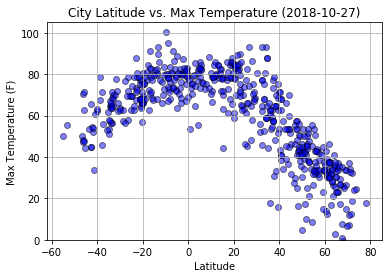

In [17]:
# Build the scatter plots for each city types
plt.scatter(filter_pd["Lat"], filter_pd["Max Temp"], marker="o", alpha=0.5, facecolors="blue", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-62, 85)
plt.ylim(0, 105)
plt.grid()

# Save Figure
output_file = "output/scatter1_lat_x_temp.png"                      
if os.path.exists(output_file):
  os.remove(output_file)
plt.savefig(output_file)

# Show Figure
plt.show()

#### Latitude vs. Humidity Plot

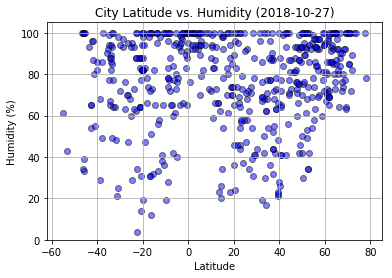

In [18]:
# Build the scatter plots for each city types
plt.scatter(filter_pd["Lat"], filter_pd["Humidity"], marker="o", alpha=0.5, facecolors="blue", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-62, 85)
plt.ylim(0, 105)
plt.grid()

# Save Figure
output_file = "output/scatter2_lat_x_humidity.png"                      
if os.path.exists(output_file):
  os.remove(output_file)
plt.savefig(output_file)

# Show Figure
plt.show()

#### Latitude vs. Cloudiness Plot

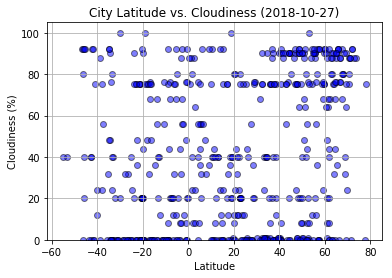

In [19]:
# Build the scatter plots for each city types
plt.scatter(filter_pd["Lat"], filter_pd["Cloudiness"], marker="o", alpha=0.5, facecolors="blue", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-62, 85)
plt.ylim(0, 105)
plt.grid()

# Save Figure
output_file = "output/scatter3_lat_x_cloudiness.png"                      
if os.path.exists(output_file):
  os.remove(output_file)
plt.savefig(output_file)

# Show Figure
plt.show()

#### Latitude vs. Wind Speed Plot

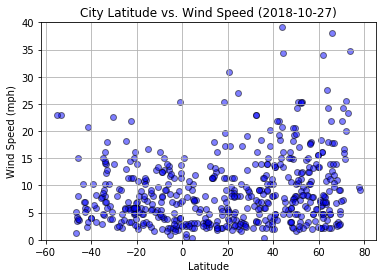

In [20]:
# Build the scatter plots for each city types
plt.scatter(filter_pd["Lat"], filter_pd["Wind Speed"], marker="o", alpha=0.5, facecolors="blue", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-62, 85)
plt.ylim(0, 40)
plt.grid()

# Save Figure
output_file = "output/scatter4_lat_x_wind.png"
if os.path.exists(output_file):
  os.remove(output_file)
plt.savefig(output_file)

# Show Figure
plt.show()